In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/aps_failure_training_set.csv", skiprows=20)

In [ ]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def cost(X,Y,theta,lamb):
  e = 1e-10 
  m = X.shape[0]
  h = sigmoid((X@theta))
  #print(h)
  cost = ((-Y.T @ np.log(h+e))-((1-Y.T) @ np.log(1-h+e)))/m + lamb*((theta.T @ theta))
  return cost

def gradient_descent(X,Y,learn_rate,theta,lamb):
  m = X.shape[0]
  h = sigmoid((X@theta))
  grad = (X.T @ (h-Y))/m
  regular = 2*theta
  theta = theta-learn_rate*(grad+lamb*regular)
  return theta

def gradient_newton(X,Y,learn_rate,theta,lamb):
  m = X.shape[0]
  h = sigmoid((X@theta))
  grad = (X.T @ (h-Y))/m
  #print(h @ (1-h))
  print(h.shape)
  H = np.multiply(h,1-h)
  print(H.shape)
  #D = np.diag(H)
  h = X.T @ H
  Hess = h @ X
  m = Hess.shape[0]
  Hess = Hess + lamb*(np.identity(m))
  #inv = np.linalg.inv(Hess)
  regular = 2*theta
  theta = theta-(np.linalg.solve(Hess, grad+lamb*regular))
  return theta


In [ ]:
#print(df.shape)
df.replace(to_replace= 'na', value = 0, inplace=True )
cond = (df['class'] == 'neg')
df.loc[cond,'class'] = 0
cond = (df['class'] == 'pos')
df.loc[cond,'class'] = 1
Y = df['class']
X = df.iloc[0:,1:]
ones = []
for k in range(X.shape[0]):
  ones.append([1])

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = np.append(X,ones,axis=1)
#print(scaler.mean_)

#print(Y)
print(X)

[[ 0.11938141 -0.0963075   2.31022415 ... -0.02025676 -0.02353972
   1.        ]
 [-0.18069661 -0.0963075  -0.43285893 ... -0.02025676 -0.02353972
   1.        ]
 [-0.12581066 -0.0963075  -0.43285864 ... -0.02025676 -0.02353972
   1.        ]
 ...
 [-0.40724039 -0.0963075   2.31022414 ... -0.02025676 -0.02353972
   1.        ]
 [ 0.14409453 -0.0963075   2.31022414 ... -0.02025676 -0.02353972
   1.        ]
 [-0.13143541 -0.0963075  -0.43285803 ... -0.02025676 -0.02353972
   1.        ]]


In [ ]:
A = X.T @ X
print(A.shape)
learn,v = (np.linalg.eig(A))
#print((learn))
learn_rate = X.shape[0]/(max(learn))
print(1/learn_rate)
print(learn_rate)

(171, 171)
48.48910719646376
0.020623188543115276


In [78]:
learn_rateg = X.shape[0]/(max(learn)+2*0.1)
print(learn_rateg)

0.020623187125395685


In [79]:
learn_rate_g = X.shape[0]/(max(learn)+2*100)
print(learn_rate_g)

0.020621770920882628


In [ ]:
print(X.shape)

(60000, 171)


In [ ]:
x=X

In [ ]:
#theta = np.zeros(X.shape[1])
#print(theta)


#x = X.to_numpy(dtype=float)
#print(x.shape)

#print(y)
#x = 9np.asarray(X)
#l = (sigmoid(np.matmul(x,theta))-y)
#print(np.matmul(x.T, l))
#print(y.shape)
#ones = np.ones(t.shape[0]) 
#x = np.hstack([ones, t]) 
#print(x)
def cost_iter(x,y,theta,lamb,alph):
  n_iter = 1000
  func = []
  iter = []
  for k in range(n_iter):
    iter.append(k)
    func.append(cost(x,y,theta,lamb))
    #print(cost(x,y,theta,lamb))
    #print(theta)
    theta_o = theta
    theta = gradient_descent(x,y,alph,theta,lamb)
    #print(theta)
    #print(cost(x,y,theta,lamb))
    if abs(cost(x,y,theta_o,lamb)-cost(x,y,theta,lamb)) < 0.0001:
      #print(breakg)
      break
  return iter,func

#plt.plot(iter,func)

In [ ]:
theta = np.zeros(X.shape[1])
y = Y.to_numpy(dtype=float)
print(y)

[0. 0. 0. ... 0. 0. 0.]


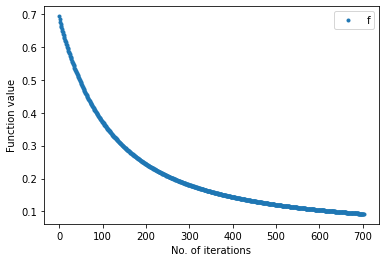

In [ ]:
fig1 = plt.figure()
iterate_1, funct_value_1 = cost_iter(x,y,theta,0,learn_rate)
plt.plot(iterate_1, funct_value_1,'.')
plt.xlabel("No. of iterations")
plt.ylabel("Function value")
plt.legend("f")

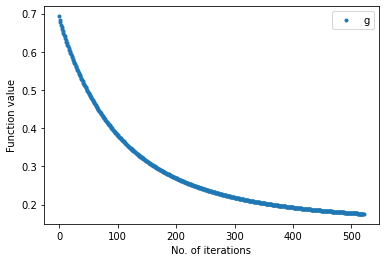

In [80]:
gfig1 = plt.figure()
theta = np.zeros(X.shape[1])
iterate_g1, funct_value_g1 = cost_iter(x,y,theta,0.01,learn_rateg)
plt.plot(iterate_g1, funct_value_g1, '.')
plt.xlabel("No. of iterations")
plt.ylabel("Function value")
plt.legend("g(,0.01)")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in matmul
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in matmul
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in matmul
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in matmul
  impor

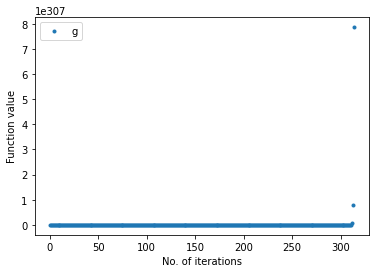

In [81]:
g_fig1 = plt.figure()
theta = np.zeros(X.shape[1])
iterate_g_1, funct_value_g_1 = cost_iter(x,y,theta,100,learn_rate_g)
plt.plot(iterate_g_1, funct_value_g_1,'.')
plt.xlabel("No. of iterations")
plt.ylabel("Function value")
plt.legend("g(,100)")

In [ ]:

(fig1,gfig1)

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

In [76]:
def cst_iter(x,y,theta,lamb,alph):
  n_iter = 1000
  func = []
  iter = []
  for k in range(n_iter):
    iter.append(k)
    func.append(cost(x,y,theta,lamb))
    #print(theta)
    theta_o = theta
    theta = gradient_descent(x,y,alph/(np.sqrt(k+1)),theta,lamb)
    #print(theta)
    if abs(cost(x,y,theta_o,lamb)-cost(x,y,theta,lamb)) < 0.0001:
      #print(breakg)
      break
  return iter,func

In [ ]:
#print(x)

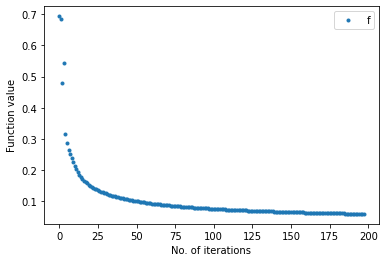

In [77]:
theta = np.zeros(X.shape[1])
iterate_2, funct_value_2 = cst_iter(x,y,theta,0,1)
plt.plot(iterate_2, funct_value_2,'.')
plt.xlabel("No. of iterations")
plt.ylabel("Function value")
plt.legend("f")

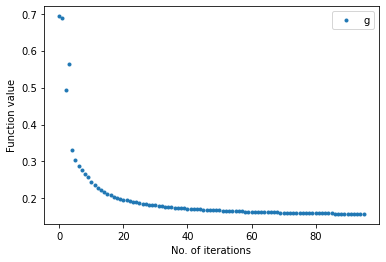

In [ ]:
theta = np.zeros(X.shape[1])
iterate_g2, funct_value_g2 = cst_iter(x,y,theta,0.01,1)
plt.plot(iterate_g2, funct_value_g2,'.')
plt.xlabel("No. of iterations")
plt.ylabel("Function value")
plt.legend("g(,0.01)")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in matmul
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in matmul
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in matmul
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encou

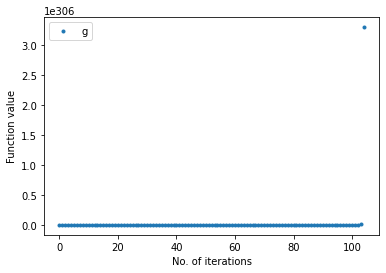

In [82]:
theta = np.zeros(X.shape[1])
iterate_g_2, funct_value_g_2 = cst_iter(x,y,theta,100,1)
plt.plot(iterate_g_2, funct_value_g_2,'.')
plt.xlabel("No. of iterations")
plt.ylabel("Function value")
plt.legend("g(,0.01)")

In [ ]:
def cist_iter(x,y,theta,lamb,alph):
  n_iter = 1000
  func = []
  iter = []
  for k in range(n_iter):
    iter.append(k)
    func.append(cost(x,y,theta,lamb))
    #print(cost(x,y,theta,lamb))
    theta_o = theta
    theta = gradient_newton(x,y,1,theta,lamb)
    #print(cost(x,y,theta,lamb))
    if ((cost(x,y,theta_o,lamb)-cost(x,y,theta,lamb))) < 0.0001:
      #print(breakg)
      break
  return iter,func

In [ ]:

def gradient_newton(X,Y,learn_rate,theta,lamb):
  m = X.shape[0]
  h = sigmoid((X@theta))
  grad = (X.T @ (h-Y))/m
  #print(h @ (1-h))
  #print(h.shape)
  H = np.multiply(h,1-h)/m
  #print(H.shape)
  #D = np.diag(H)
  q = np.multiply(X.T,H)
  #print(h.shape)
  Hess = q @ X
  n = Hess.shape[0]
  Hass = Hess + lamb*(np.identity(n))
  #inv = np.linalg.inv(Hess)
  regular = 2*theta
  theta = theta-(np.linalg.solve(Hass, grad+lamb*regular))
  return theta

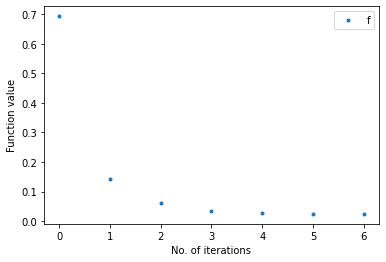

In [ ]:
theta = np.zeros(X.shape[1])
iterate_3, funct_value_3 = cist_iter(x,y,theta,0,1)
plt.plot(iterate_3, funct_value_3,'.')
plt.xlabel("No. of iterations")
plt.ylabel("Function value")
plt.legend("f")

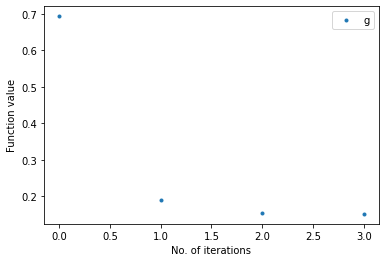

In [ ]:
theta = np.zeros(X.shape[1])
iterate_g3, funct_value_g3 = cist_iter(x,y,theta,0.01,1)
plt.plot(iterate_g3, funct_value_g3,'.')
plt.xlabel("No. of iterations")
plt.ylabel("Function value")
plt.legend("g")

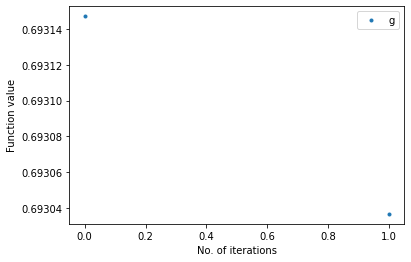

In [ ]:
theta = np.zeros(X.shape[1])
iterate_g_3, funct_value_g_3 = cist_iter(x,y,theta,100,1)
plt.plot(iterate_g_3, funct_value_g_3,'.')
plt.xlabel("No. of iterations")
plt.ylabel("Function value")
plt.legend("g")

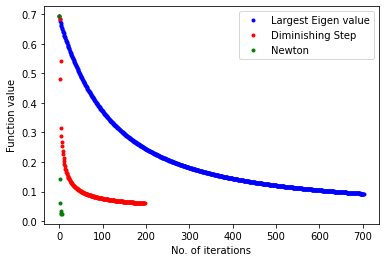

In [83]:
plt.plot(iterate_1, funct_value_1,'b.',iterate_2, funct_value_2,'r.',iterate_3, funct_value_3,'g.',)
#label=['Largest Eigen value','Diminishing Step','Newton'])
plt.xlabel("No. of iterations")
plt.ylabel("Function value")
plt.legend(['Largest Eigen value','Diminishing Step','Newton'])

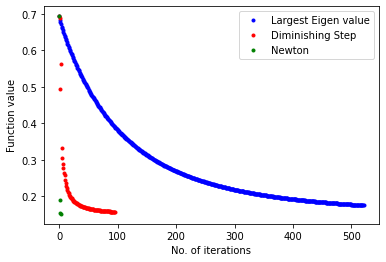

In [84]:
plt.plot(iterate_g1, funct_value_g1,'b.',iterate_g2, funct_value_g2,'r.',iterate_g3, funct_value_g3,'g.',)
#label=['Largest Eigen value','Diminishing Step','Newton'])
plt.xlabel("No. of iterations")
plt.ylabel("Function value")
plt.legend(['Largest Eigen value','Diminishing Step','Newton'])

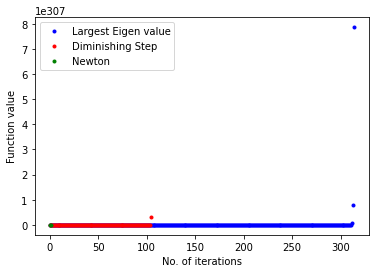

In [85]:
plt.plot(iterate_g_1, funct_value_g_1,'b.',iterate_g_2, funct_value_g_2,'r.',iterate_g_3, funct_value_g_3,'g.',)
#label=['Largest Eigen value','Diminishing Step','Newton'])
plt.xlabel("No. of iterations")
plt.ylabel("Function value")
plt.legend(['Largest Eigen value','Diminishing Step','Newton'])